# Generate results comparing lines and geodesics between $q^{\text{ref}}$ and $q$

In [1]:
COL_TO_TEXT = {
    "diff_seq_per_time_vertex_diameter": "Error per mesh per vertex [% diameter]",
    "diff_seq_duration_per_time_and_vertex": "Time difference [secs] per mesh and vertex",
    "relative_diff_seq_duration": "Time difference per vertex [% line]",
    "noise_factor": "Deformation factor, Steps",
    "noise_factor_n_vertices": "Deformation factor, # Vertices",
    "n_steps": "Number of steps",
    "n_vertices": "Number of vertices",
    "rmsd": "RMSD",
    "rmsd_diameter": "RMSD, Line vs. Geodesic (per diameter)",
    "speed": "Speed gain",
    "accuracy": "Accuracy",
}

In [2]:
import numpy as np
import pandas as pd

We load the .csv that corresponds to the wandb Table downloaded from:

https://wandb.ai/bioshape-lab/line_vs_geodesic/table?workspace=user-ninamiolane

In [3]:
df = pd.read_csv("05_compare_line_vs_geodesic.csv")
df.head()

Name     State Notes        User  Tags                   Created  \
0  run_5hheo8x0  finished     -  adelemyers   NaN  2023-08-12T01:17:59.000Z   
1  run_tfx4b0at  finished     -  adelemyers   NaN  2023-08-12T00:10:35.000Z   
2  run_hjc51vgm  finished     -  adelemyers   NaN  2023-08-12T00:02:50.000Z   
3  run_4oy5o51b  finished     -  adelemyers   NaN  2023-08-11T22:53:59.000Z   
4  run_4noio6tq  finished     -  adelemyers   NaN  2023-08-11T22:15:06.000Z   

   Runtime  Sweep dataset_name  diameter  ...  linear_regression_duration  \
0     4936    NaN    synthetic    162000  ...                    0.000202   
1     4042    NaN    synthetic      5400  ...                    0.000207   
2      463    NaN    synthetic       180  ...                    0.000173   
3     4129    NaN    synthetic    162000  ...                    0.000160   
4     2332    NaN    synthetic      5400  ...                    0.000149   

   linear_regression_duration_per_vertex  relative_diff_dist  \
0                           3.152919e-07       -2.127873e+06   
1                           1.280396e-06       -1.243415e+04   
2                           4.115559e-06       -3.665387e+01   
3                           2.499310e-07       -1.977338e+06   
4                           9.168813e-07       -9.244901e+03   

   relative_diff_duration  relative_diff_seq_duration  \
0           -7.739856e+06               -8.167321e+06   
1           -8.943663e+05               -6.104826e+06   
2           -2.928533e+05               -1.161909e+06   
3           -4.910688e+06               -8.742010e+06   
4           -1.590585e+06               -5.433371e+06   

   relative_diff_seq_per_time_and_vertex      run_name  post_error  \
0                           -1272.168322  run_5hheo8x0        True   
1                           -3768.411388  run_tfx4b0at        True   
2                           -2766.451072  run_hjc51vgm        True   
3                           -1361.683863  run_4oy5o51b        True   
4                           -3353.932743  run_4noio6tq        True   

          rmsd  rmsd_diameter  
0  9545.875277       0.058925  
1   503.849407       0.093305  
2    22.199847       0.123332  
3  5638.672282       0.034807  
4   398.567954       0.073809  

[5 rows x 42 columns]

The columns of the dataframe corresponding to the .csv are the variables that we have logged into wandb:

$$RMSD = \sqrt{\frac{1}{TN} \sum_t \sum_i \| v_{it} - \hat{v}_{it}\|^2}.$$

Currently, we have:
$$Diffseq = \frac{\sqrt{\sum_t \sum_i \|v_{it} - \hat{v}_{it}\|^2}}{TN} = \frac{RMSD}{\sqrt{TN}}$$

so that we compute the RMSD par multiplyting by $\sqrt{TN}$.

In [4]:
#    diff_seq_per_time_and_vertex = gs.linalg.norm(line - geodesic) / (
#     wandb_config.n_times * n_vertices
# )

In [5]:
df["speed"] = df["geodesic_duration"] / df["line_duration"]
df["rmsd"] = df["diff_seq_per_time_and_vertex"] * np.sqrt(
    df["n_vertices"] * df["n_times"]
)
df["rmsd_diameter"] = df["rmsd"] / df["diameter"]

In [6]:
df.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'dataset_name', 'diameter', 'n_faces', 'n_steps', 'n_times',
       'n_vertices', 'noise_factor', 'subdivisions', 'diff_dist',
       'diff_dist_per_vertex', 'diff_duration', 'diff_duration_per_vertex',
       'diff_seq_duration', 'diff_seq_duration_per_time_and_vertex',
       'diff_seq_per_time_and_vertex', 'diff_seq_per_time_vertex_diameter',
       'geodesic_dist', 'geodesic_dist_per_vertex', 'geodesic_duration',
       'geodesic_regression_duration',
       'geodesic_regression_duration_per_vertex', 'line_duration',
       'linear_dist', 'linear_dist_per_vertex', 'linear_regression_duration',
       'linear_regression_duration_per_vertex', 'relative_diff_dist',
       'relative_diff_duration', 'relative_diff_seq_duration',
       'relative_diff_seq_per_time_and_vertex', 'run_name', 'post_error',
       'rmsd', 'rmsd_diameter', 'speed'],
      dtype='object')

We can plot histograms of some of these variables to get intuition of their values.

Here, we plot how long is takes to compute one line between two meshes, per vertex. We see that it takes less than 1 microsecond per vertex, i.e. less than 5 seconds to compute a line between two meshes that has 5 mesh along the sequence and these meshes have 1000 vertices.

Average: 4.665270624338108e-07


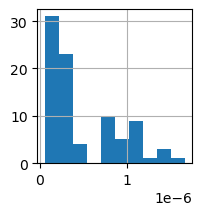

In [7]:
line_duration_per_time_vertex = df["line_duration"] / (df["n_vertices"] * df["n_times"])
print("Average:", line_duration_per_time_vertex.mean())
line_duration_per_time_vertex.hist(figsize=(2, 2));

We compare the time taken to compute a line versus a geodesic between two meshes.

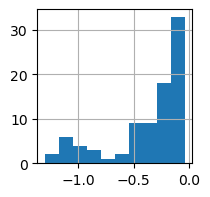

In [8]:
df["diff_seq_duration_per_time_and_vertex"].hist(figsize=(2, 2));

## Histograms

We write a function that can plot more sophisticated histograms, by grouping according to a given variable `by`.

In [9]:
import plotly.express as px


def histogram_per_n_steps(varname="speed"):
    fig = px.histogram(
        df[df["noise_factor"] <= 0.5],
        x=varname,
        color="n_steps",
        opacity=1,
        color_discrete_sequence=px.colors.sequential.Plasma_r,
        nbins=8,
        barmode="group",
    )

    fig.update_layout(
        title=COL_TO_TEXT[varname],
        showlegend=True,
        width=600,
        height=400,
    )

    fig.show()

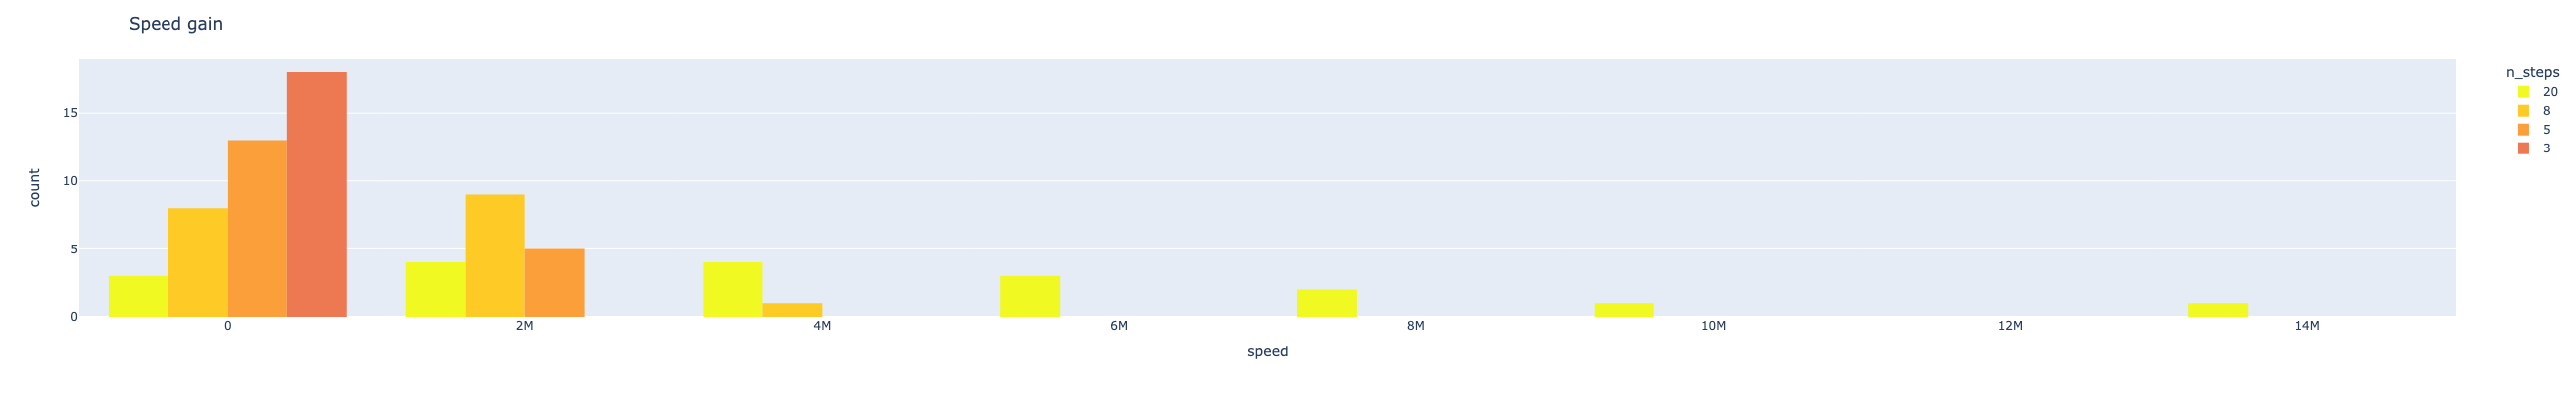

In [10]:
histogram_per_n_steps("speed")

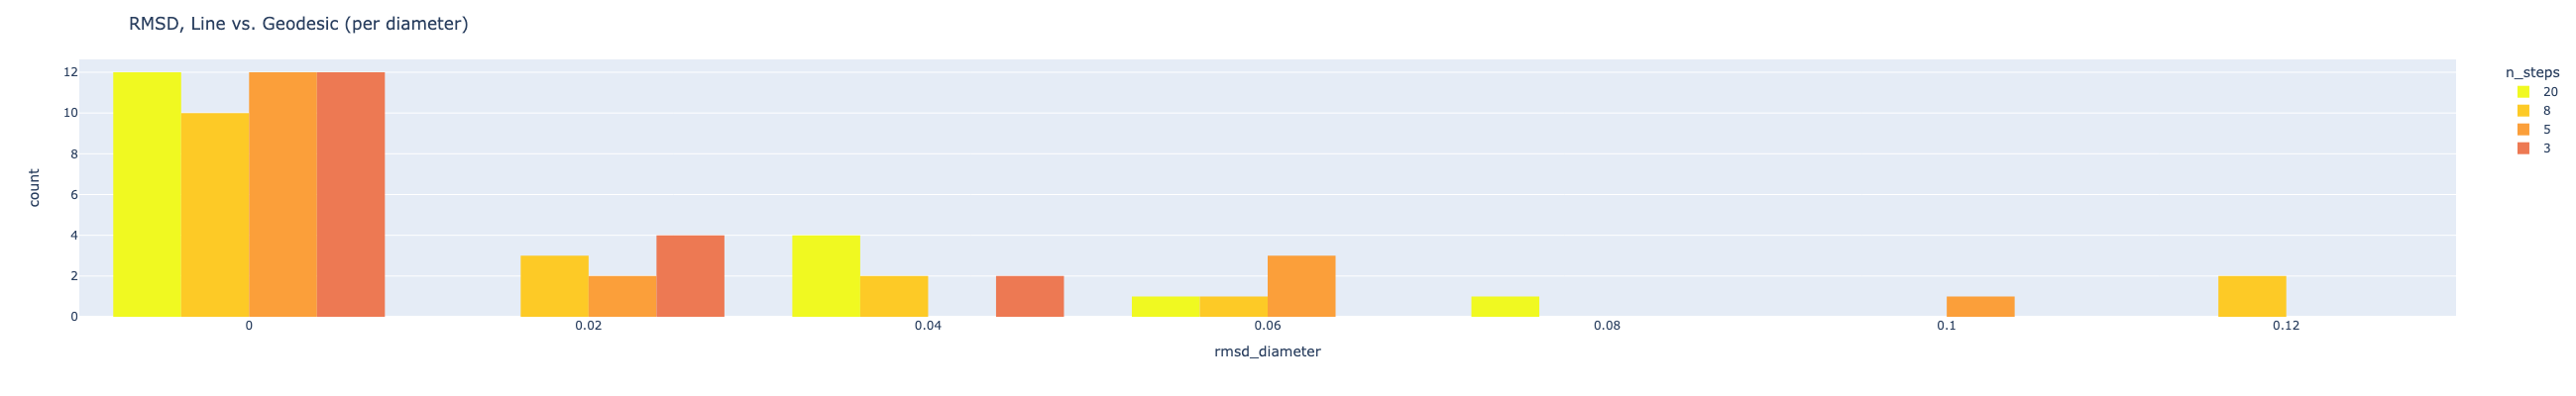

In [11]:
histogram_per_n_steps("rmsd_diameter")

In [12]:
import plotly.graph_objects as go


def hist_diff_seq_per_time_vertex_diameter_group(by="n_steps"):
    grouped_data = df.groupby(by)["diff_seq_per_time_vertex_diameter"]

    fig = go.Figure()

    for name, group in grouped_data:
        fig.add_trace(go.Histogram(x=group, opacity=0.5, name=f"{by} = {name}"))

    fig.update_layout(
        title=COL_TO_TEXT["diff_seq_per_time_vertex_diameter"],
        showlegend=True,
        width=600,  # Set the width of the figure to 500
        height=400,
    )

    fig.show()

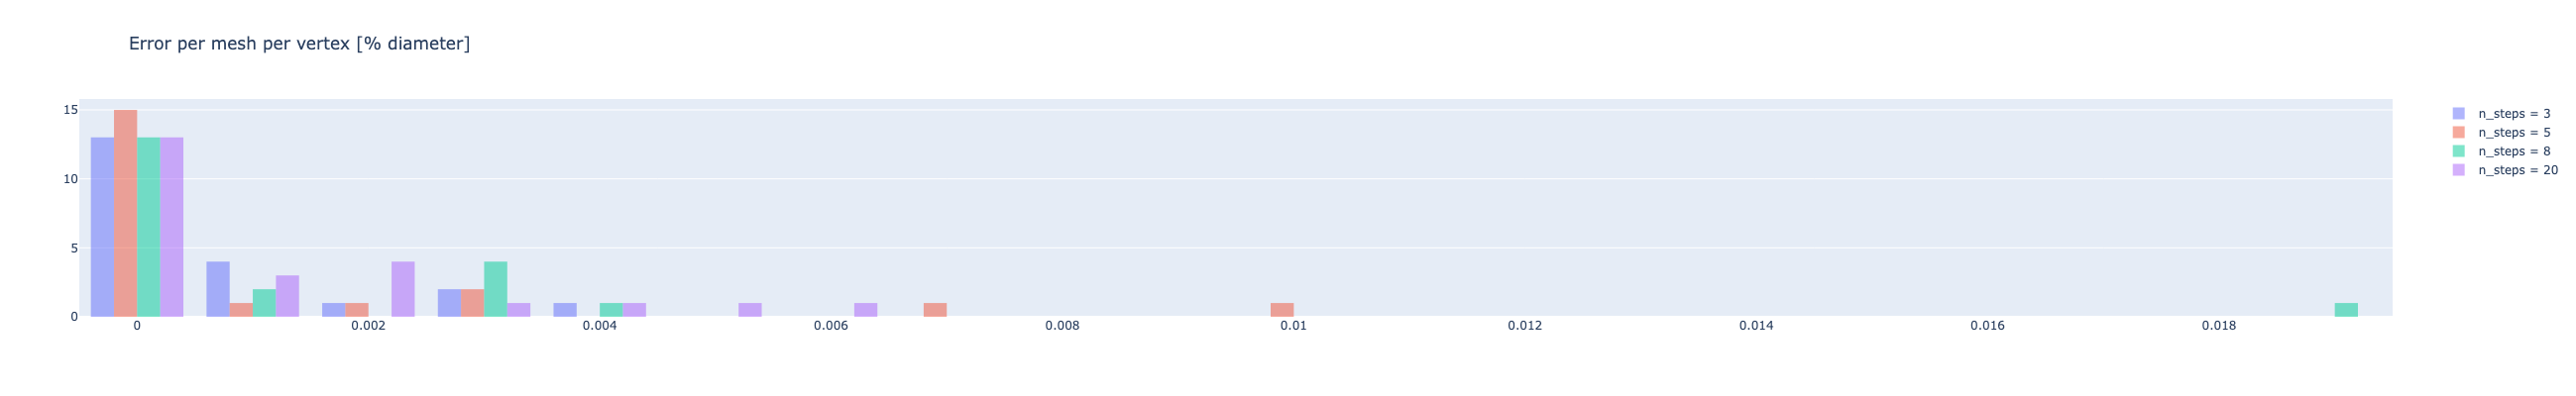

In [13]:
hist_diff_seq_per_time_vertex_diameter_group(by="n_steps")

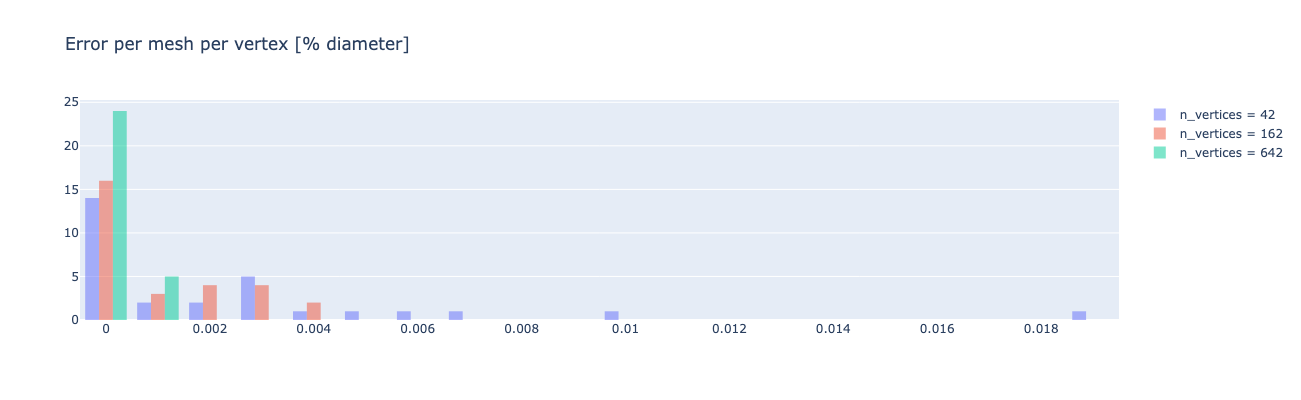

In [14]:
hist_diff_seq_per_time_vertex_diameter_group(by="n_vertices")

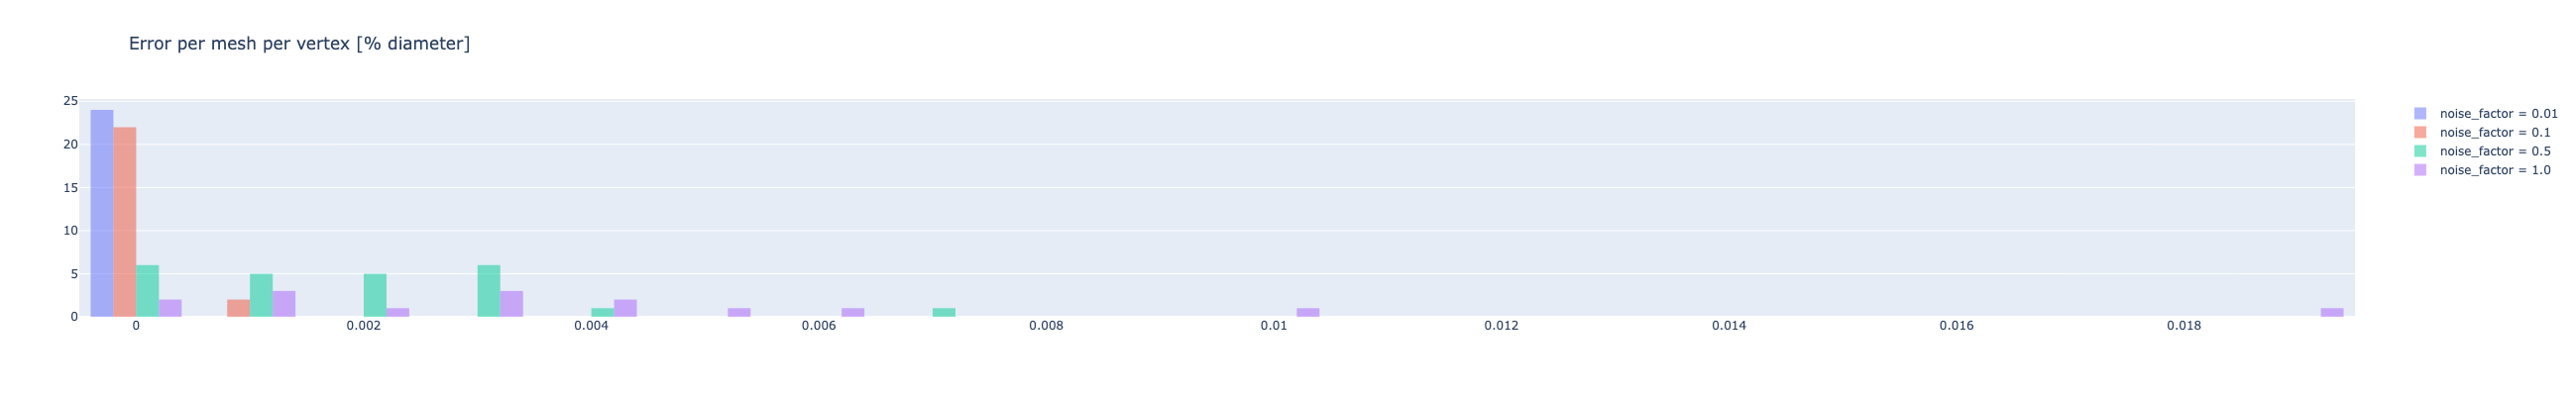

In [15]:
hist_diff_seq_per_time_vertex_diameter_group(by="noise_factor")

## Scatter plots

We write code to generate the main plot for the corresponding section of the paper.

In [16]:
# diff_seq_per_time_and_vertex = gs.linalg.norm(line - geodesic) / (
#     wandb_config.n_times * n_vertices
# )

# diff_seq_per_time_vertex_diameter = diff_seq_per_time_and_vertex / diameter

In [17]:
import plotly.express as px
import plotly.io as pio

fontsize = 15


def diff_scatter_grouped(
    colored_by="noise_factor",
    marked_by="n_steps",
    diff_seq="relative_diff_seq_duration",
):
    x = df["diff_seq_per_time_vertex_diameter"] * 100
    y = np.abs(df[diff_seq]) / df["n_vertices"]
    value_to_symbol = dict(
        zip(df[marked_by].unique(), ["square", "x", "cross", "diamond", "star"])
    )

    if colored_by == "n_steps":
        color_discrete_sequence = px.colors.sequential.Plasma_r
    else:
        color_discrete_sequence = px.colors.sequential.Viridis_r

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=[str(c) for c in df[colored_by].values],
        color_discrete_sequence=color_discrete_sequence,  # px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        # color_discrete_sequence=px.colors.sequential.Viridis_r, #px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        symbol=[s for s in df[marked_by].values],
        symbol_map=value_to_symbol,
    )

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT["diff_seq_per_time_vertex_diameter"],
            font=dict(family="CMU", size=fontsize),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[diff_seq], font=dict(family="CMU", size=fontsize)
        ),
        title_font=dict(family="CMU", size=fontsize),
        xaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        yaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        legend=dict(
            font=dict(family="CMU", size=fontsize), title=COL_TO_TEXT[colored_by]
        ),
        width=650,
        height=370,
    )

    fig.update_traces(marker=dict(size=9, opacity=0.9))
    pio.write_image(fig, f"line_vs_geodesic_colored_by_{colored_by}.svg")
    fig.show()

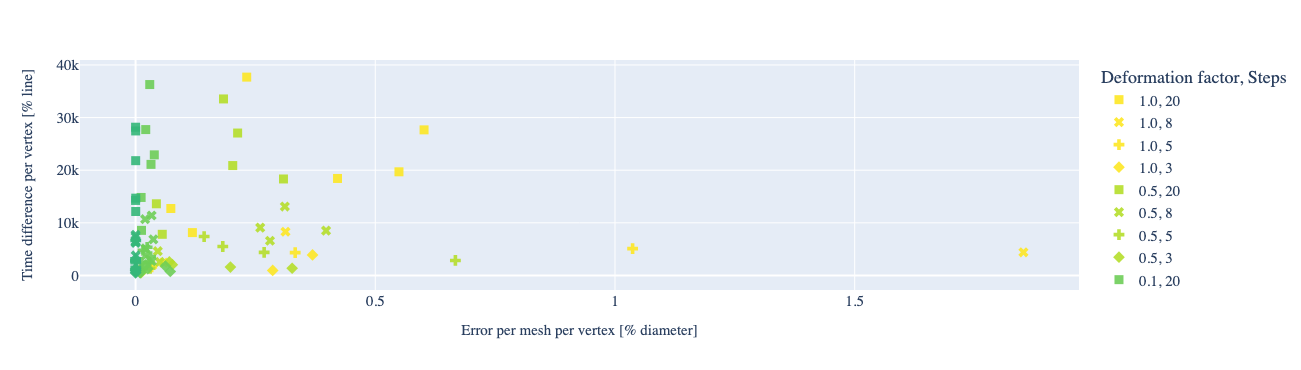

In [18]:
diff_scatter_grouped(colored_by="noise_factor", marked_by="n_steps")

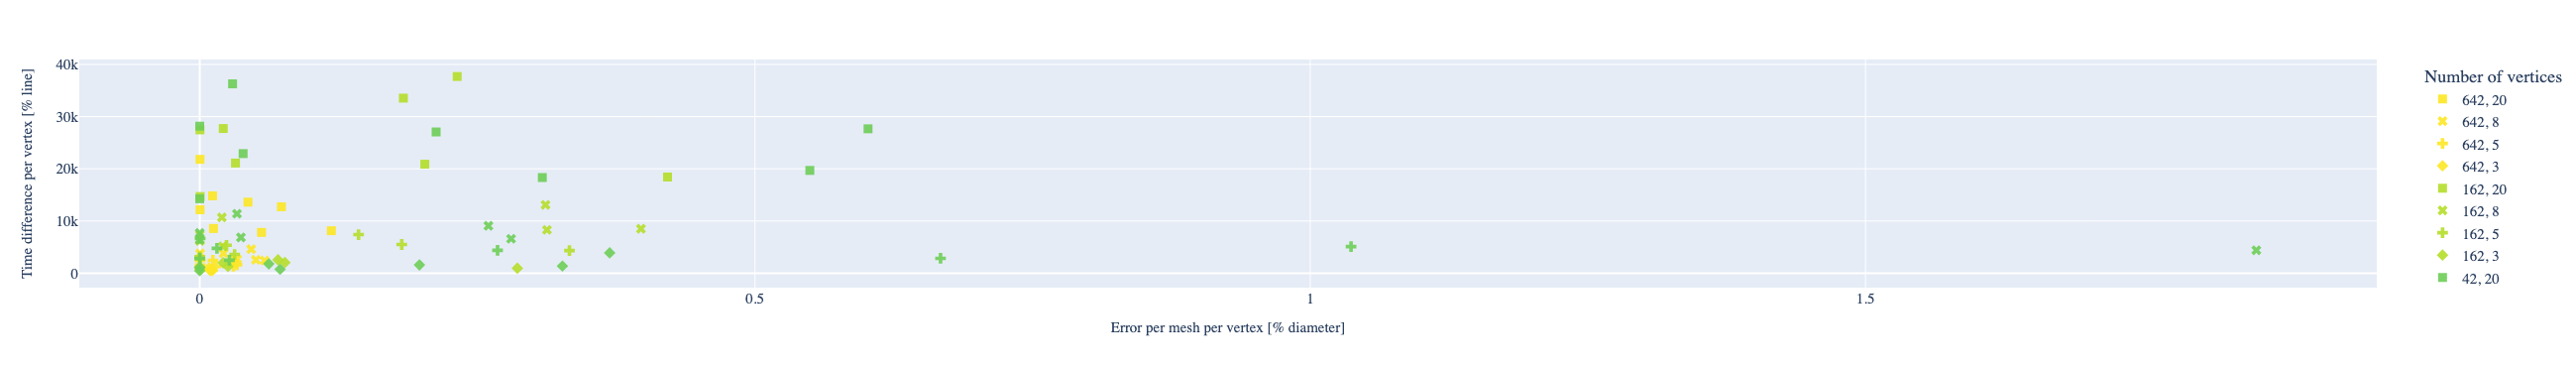

In [19]:
diff_scatter_grouped(colored_by="n_vertices", marked_by="n_steps")

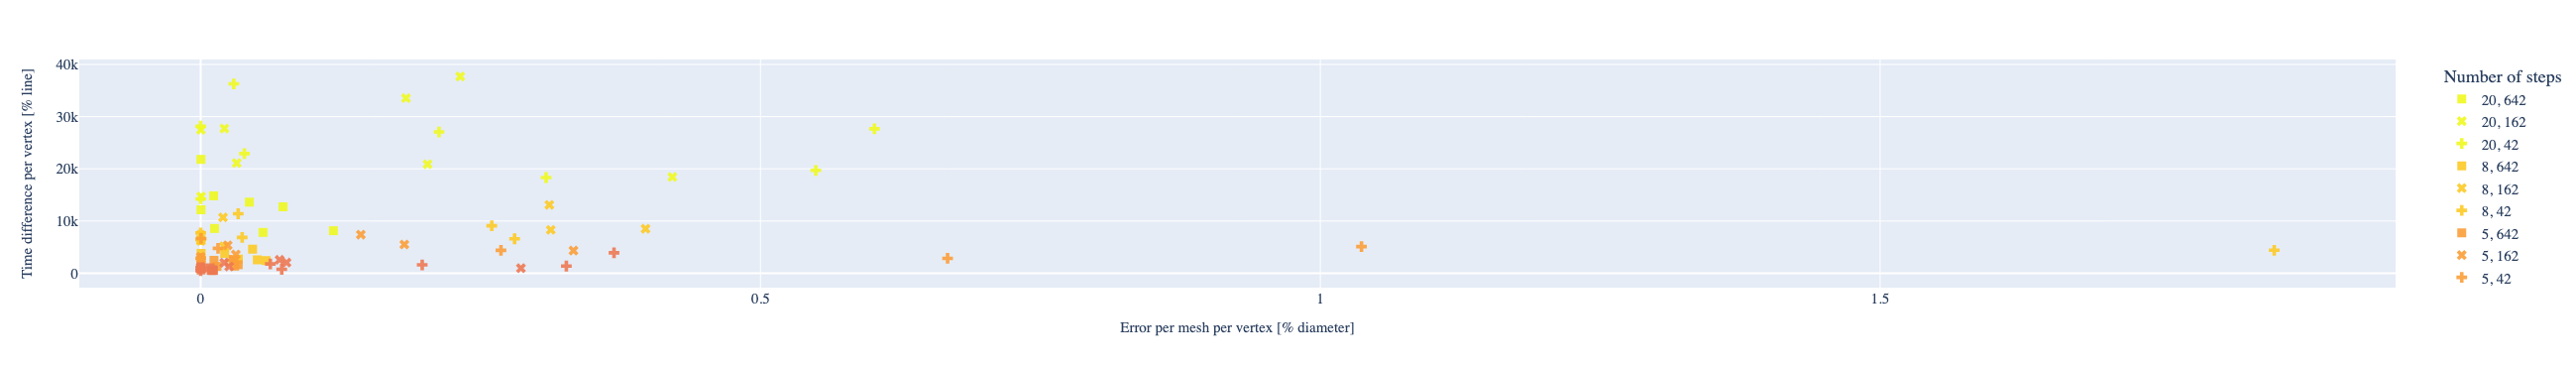

In [20]:
diff_scatter_grouped(colored_by="n_steps", marked_by="n_vertices")

# Redo Accuracy vs Speed plot.

In [21]:
import plotly.express as px
import plotly.io as pio

fontsize = 15


def new_diff_scatter_grouped(
    df,
    x,
    y,
    xname,
    yname,
    colored_by="noise_factor",
    marked_by="n_steps",
    diff_seq="relative_diff_seq_duration",
):
    value_to_symbol = dict(
        zip(df[marked_by].unique(), ["square", "x", "cross", "diamond", "star"])
    )

    if colored_by == "n_steps":
        color_discrete_sequence = px.colors.sequential.Plasma_r
    else:
        color_discrete_sequence = px.colors.sequential.Viridis_r

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=[str(c) for c in df[colored_by].values],
        color_discrete_sequence=color_discrete_sequence,  # px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        # color_discrete_sequence=px.colors.sequential.Viridis_r, #px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        symbol=[s for s in df[marked_by].values],
        symbol_map=value_to_symbol,
    )

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT[xname],
            font=dict(family="CMU", size=fontsize),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[yname], font=dict(family="CMU", size=fontsize)
        ),
        title_font=dict(family="CMU", size=fontsize),
        xaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        yaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        legend=dict(
            font=dict(family="CMU", size=fontsize), title=COL_TO_TEXT[colored_by]
        ),
        width=650,
        height=370,
    )

    fig.update_traces(marker=dict(size=14, opacity=0.9))
    pio.write_image(fig, f"0720_speed_error_colored_by_deformation_factor_n_steps5.svg")
    fig.show()

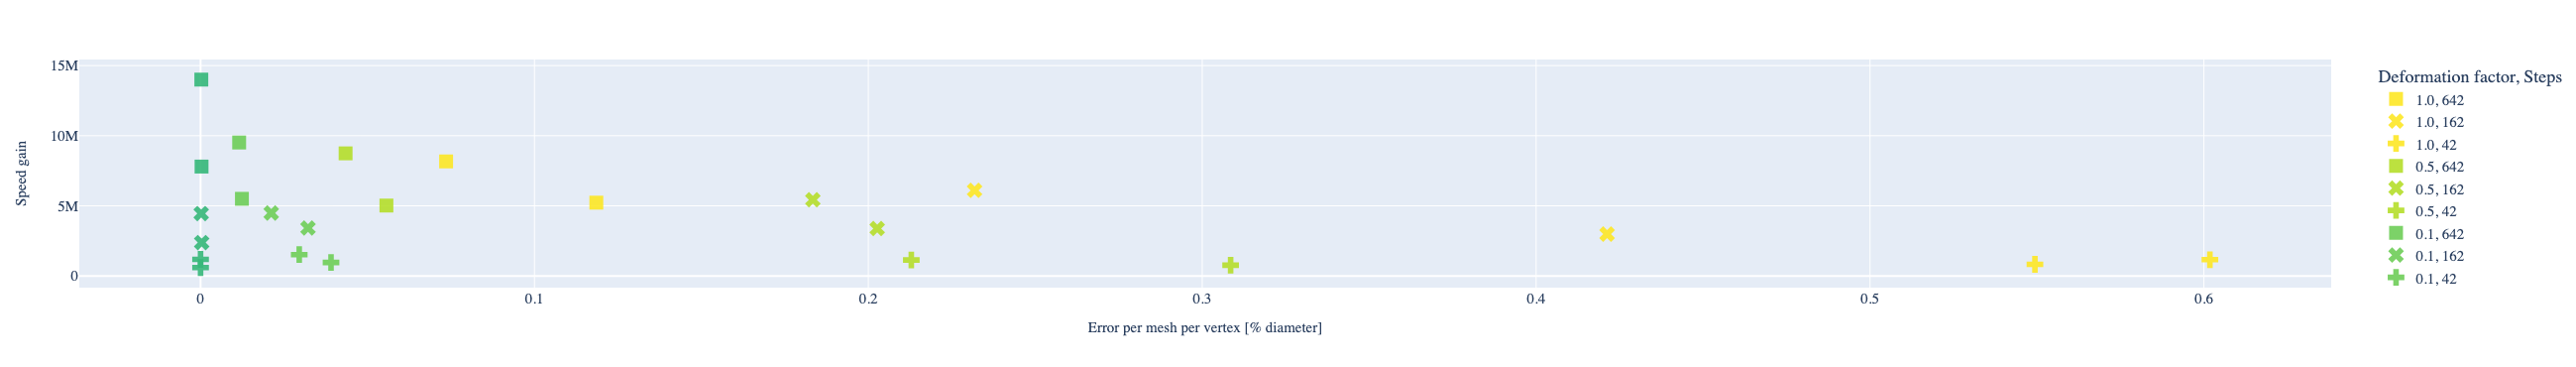

In [22]:
x = df[df["n_steps"] == 20]["diff_seq_per_time_vertex_diameter"] * 100
y = df[df["n_steps"] == 20]["speed"]
new_diff_scatter_grouped(
    df=df[df["n_steps"] == 20],
    x=x,
    y=y,
    xname="diff_seq_per_time_vertex_diameter",
    yname="speed",
    colored_by="noise_factor",
    marked_by="n_vertices",
)

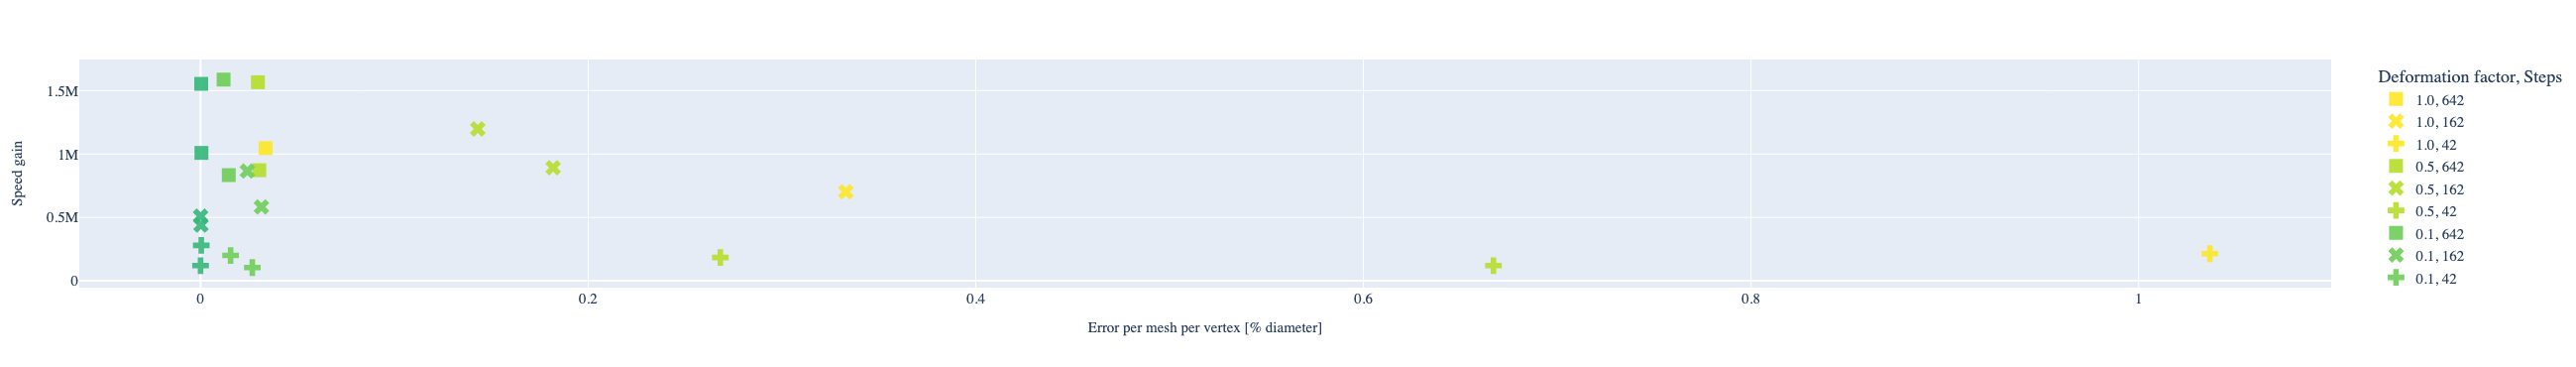

In [23]:
x = df[df["n_steps"] == 5]["diff_seq_per_time_vertex_diameter"] * 100
y = df[df["n_steps"] == 5]["speed"]
new_diff_scatter_grouped(
    df=df[df["n_steps"] == 5],
    x=x,
    y=y,
    xname="diff_seq_per_time_vertex_diameter",
    yname="speed",
    colored_by="noise_factor",
    marked_by="n_vertices",
)

In [24]:
df["diff_seq_per_time_and_vertex"]

0     1.191374e+02
1     1.251824e+01
2     1.083242e+00
3     7.037353e+01
4     9.902500e+00
          ...     
82    1.312998e-03
83    6.736057e-04
84    3.921932e-01
85    6.498580e-04
86    4.244620e-16
Name: diff_seq_per_time_and_vertex, Length: 87, dtype: float64

In [25]:
df["rmsd"]

0     9.545875e+03
1     5.038494e+02
2     2.219985e+01
3     5.638672e+03
4     3.985680e+02
          ...     
82    5.284715e-02
83    1.380481e-02
84    3.142444e+01
85    2.615628e-02
86    8.698882e-15
Name: rmsd, Length: 87, dtype: float64

In [26]:
df["rmsd_diameter"] = df["rmsd"] / df["diameter"]

In [27]:
df["rmsd_diameter"]

0     5.892516e-02
1     9.330545e-02
2     1.233325e-01
3     3.480662e-02
4     7.380888e-02
          ...     
82    9.786510e-06
83    7.669338e-05
84    1.939780e-04
85    4.843756e-06
86    4.832712e-17
Name: rmsd_diameter, Length: 87, dtype: float64

In [28]:
def plot_speed_vs_accuracy(
    df,
    colored_by="noise_factor",
    marked_by="n_vertices",
):
    speed_per_vertex = df["speed"] / df["n_vertices"]
    value_to_symbol = dict(zip(df[marked_by].unique(), ["square", "x", "cross"]))
    x = df["rmsd_diameter"]
    y = speed_per_vertex

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=[str(c) for c in df[colored_by].values],
        color_discrete_sequence=px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        symbol=[s for s in df[marked_by].values],
        symbol_map=value_to_symbol,
    )

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT["rmsd_diameter"],
            font=dict(family="CMU", size=fontsize),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT["speed"], font=dict(family="CMU", size=fontsize)
        ),
        title_font=dict(family="CMU", size=fontsize),
        xaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        yaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        legend=dict(
            font=dict(family="CMU", size=fontsize), title=COL_TO_TEXT[colored_by]
        ),
        width=650,
        height=370,
    )

    fig.update_traces(marker=dict(size=9, opacity=0.9))
    pio.write_image(fig, f"line_vs_geodesic_colored_by_{colored_by}.svg")
    fig.show()

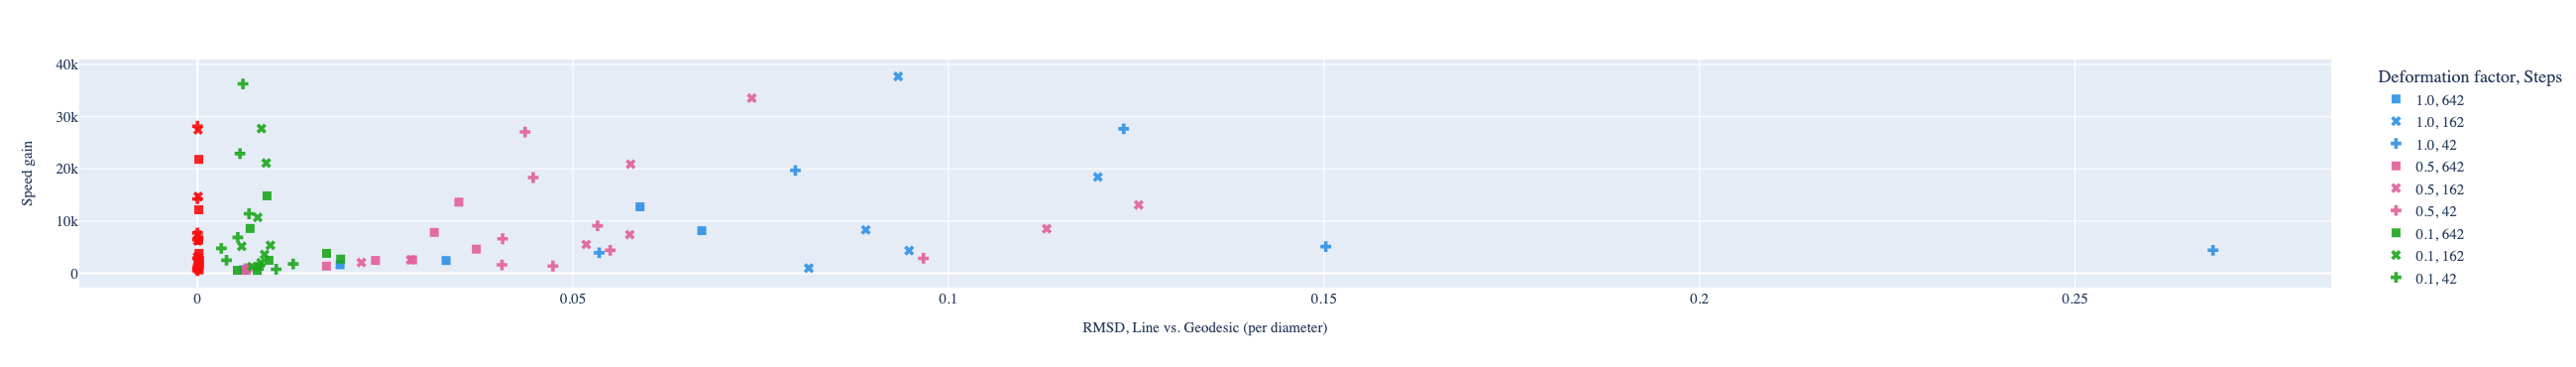

In [29]:
plot_speed_vs_accuracy(df)

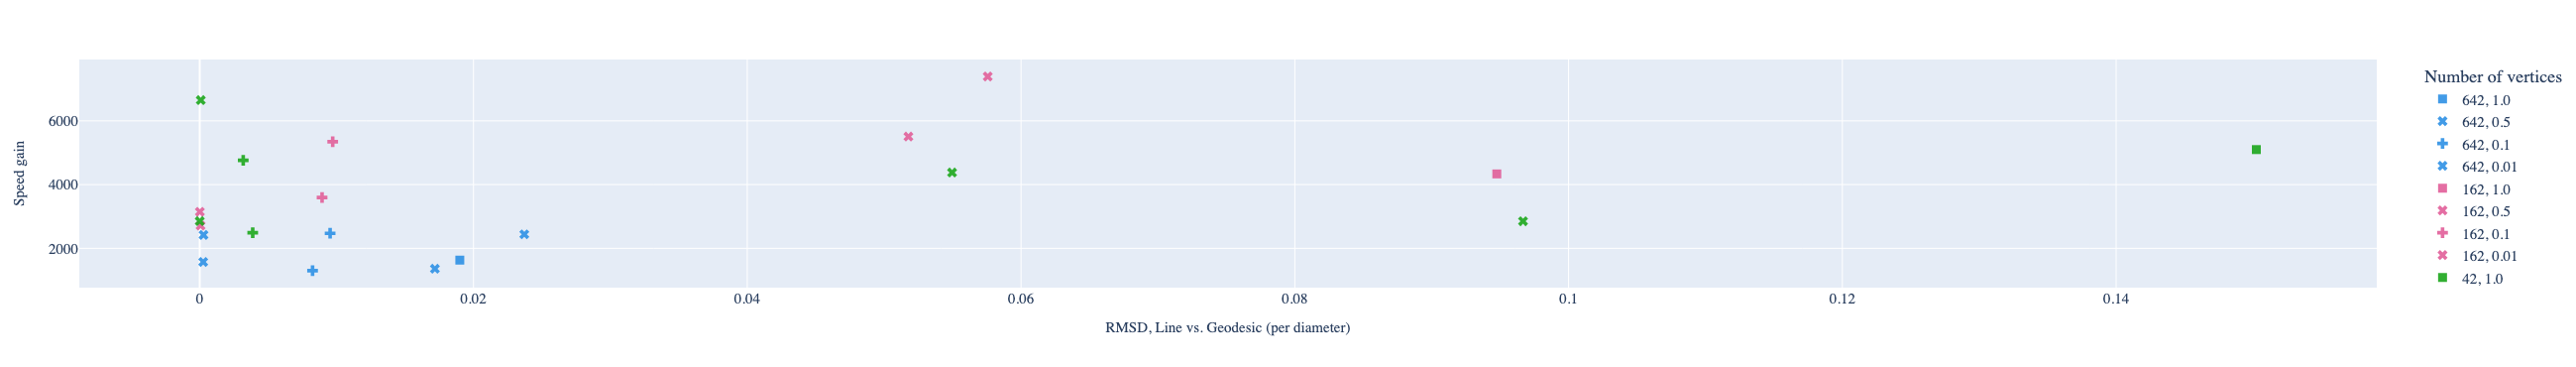

In [30]:
plot_speed_vs_accuracy(
    df[df["n_steps"] == 5], colored_by="n_vertices", marked_by="noise_factor"
)

In [31]:
len(df[df["n_steps"] == 8])

21

In [32]:
len(df)

87

# Plot RMSD_diameter vs speed, with good color map

In [24]:
import plotly.express as px
import plotly.io as pio

fontsize = 15


def speed_vs_rmsd_diameter(
    df,
    x,
    y,
    xname,
    yname,
    colored_by="noise_factor",
    marked_by="n_steps",
    diff_seq="relative_diff_seq_duration",
    n_steps = 5,
):
    value_to_symbol = dict(
        zip(df[marked_by].unique(), ["square", "x", "cross", "diamond", "star"])
    )

    if colored_by == "n_steps":
        color_discrete_sequence = px.colors.sequential.Plasma_r
    else:
        color_discrete_sequence = px.colors.sequential.Viridis_r

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=[str(c) for c in df[colored_by].values],
        color_discrete_sequence=color_discrete_sequence,  # px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        # color_discrete_sequence=px.colors.sequential.Viridis_r, #px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        symbol=[s for s in df[marked_by].values],
        symbol_map=value_to_symbol,
    )

    legend_text = colored_by + '_' + marked_by

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT[xname],
            font=dict(family="CMU", size=fontsize),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[yname], font=dict(family="CMU", size=fontsize)
        ),
        title_font=dict(family="CMU", size=fontsize),
        xaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        yaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        legend=dict(
            font=dict(family="CMU", size=fontsize), title=COL_TO_TEXT[legend_text]
        ),
        width=650,
        height=370,
    )

    fig.update_traces(marker=dict(size=14, opacity=0.9))
    pio.write_image(fig, f"speed_rmsd_diameter_colored_by_deformation_factor_n_steps{n_steps}.svg")
    fig.show()

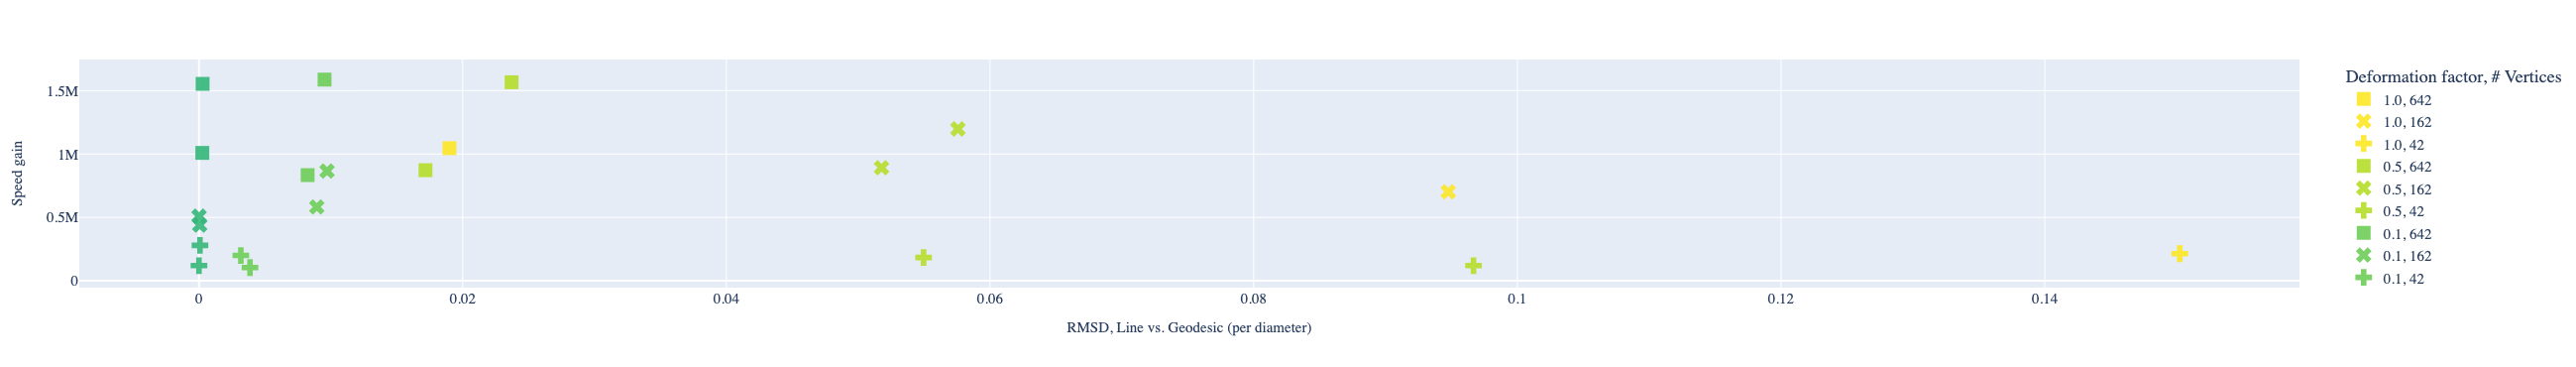

In [25]:
x = df[df["n_steps"] == 5]["rmsd_diameter"]
y = df[df["n_steps"] == 5]["speed"]
speed_vs_rmsd_diameter(
    df=df[df["n_steps"] == 5],
    x=x,
    y=y,
    xname="rmsd_diameter",
    yname="speed",
    colored_by="noise_factor",
    marked_by="n_vertices",
    n_steps = 5,
)

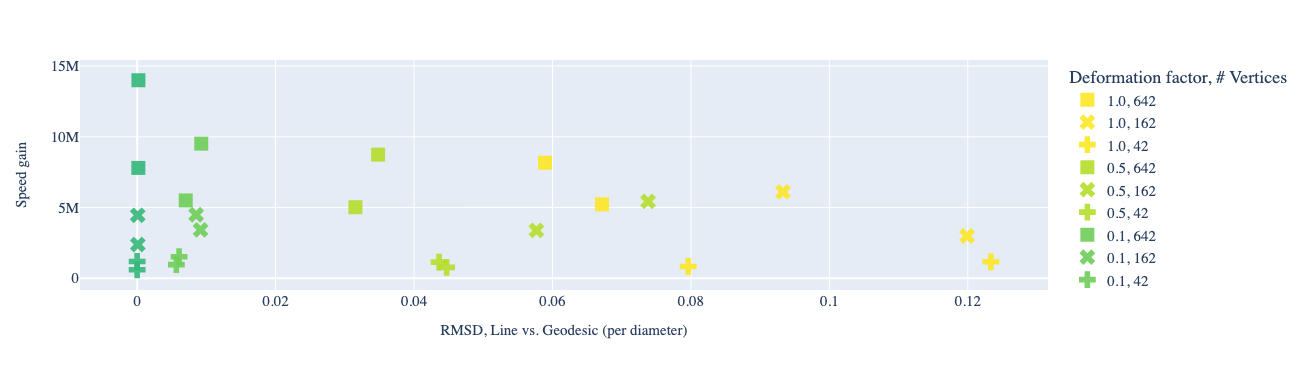

In [26]:
x = df[df["n_steps"] == 20]["rmsd_diameter"]
y = df[df["n_steps"] == 20]["speed"]
speed_vs_rmsd_diameter(
    df=df[df["n_steps"] == 20],
    x=x,
    y=y,
    xname="rmsd_diameter",
    yname="speed",
    colored_by="noise_factor",
    marked_by="n_vertices",
    n_steps = 20,
)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


def plot_vs_accuracy_lines(df):
    accuracy = 1 - df["rmsd_diameter"]
    speed_per_vertex = df["speed"] / df["n_vertices"]

    # Get unique values of n_vertices
    unique_n_vertices = df["n_vertices"].unique()

    # Create a scatter plot for each value of n_vertices
    for n_vertices in unique_n_vertices:
        # Filter data for the current n_vertices
        filtered_data = df[df["n_vertices"] == n_vertices]
        # filtered_data = filtered_data.groupby()["diff_seq_per_time_vertex_diameter"]

        # Calculate accuracy and speed per vertex
        accuracy = 1 - filtered_data.groupby("noise_factor")["rmsd_diameter"].mean()
        speed_per_vertex = (
            filtered_data.groupby("noise_factor")["speed"].mean()
            / filtered_data.groupby("noise_factor")["n_vertices"].mean()
        )

        # Plot the scatter points with a specific color
        color = plt.cm.viridis(
            n_vertices / unique_n_vertices.max()
        )  # Color based on n_vertices
        plt.scatter(
            accuracy, speed_per_vertex, color=color, label=f"n_vertices = {n_vertices}"
        )

        # Perform linear regression
        X = np.array(accuracy).reshape(-1, 1)
        y = np.array(speed_per_vertex)
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)

        # Plot the linear regression line with the same color as the points
        plt.plot(accuracy, y_pred, color=color)

    # Add labels and title
    plt.xlabel("Accuracy")
    plt.ylabel("Speed per Vertex")
    plt.title("Speed vs. Accuracy with Linear Regression")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

/tmp/ipykernel_1924240/3652573296.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



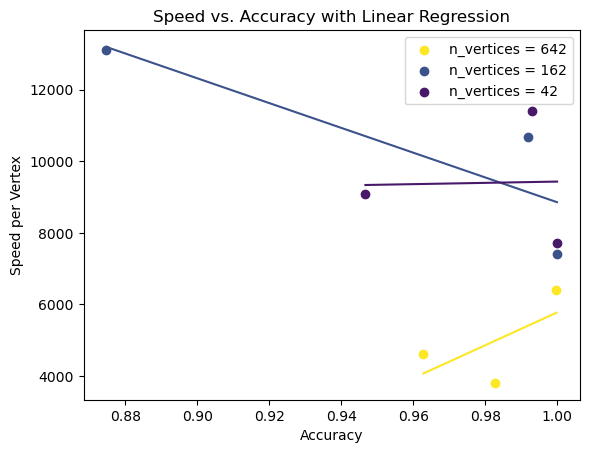

<Figure size 640x480 with 0 Axes>

In [35]:
plot_vs_accuracy_lines(df[df["n_steps"] == 8][df["n_times"] == 10])
plt.savefig("0719_speed_vs_accuracy.svg")

In [36]:
df[df["n_steps"] == 8][df["n_vertices"] == 642][df["noise_factor"] == 0.5].n_times

/tmp/ipykernel_1924240/2903945582.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_1924240/2903945582.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



27     5
60    10
Name: n_times, dtype: int64

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


def plot_vs_accuracy_lines(df):
    accuracy = 1 - df["rmsd_diameter"]
    speed_per_vertex = df["speed"] / df["n_vertices"]

    # Get unique values of n_vertices
    unique_n_vertices = df["n_vertices"].unique()

    # Create a scatter plot for each value of n_vertices
    for n_vertices in unique_n_vertices:
        # Filter data for the current n_vertices
        filtered_data = df[df["n_vertices"] == n_vertices]

        # Calculate accuracy and speed per vertex
        accuracy = 1 - filtered_data["rmsd_diameter"]
        speed_per_vertex = filtered_data["speed"] / filtered_data["n_vertices"]

        # Plot the scatter points with a specific color
        color = plt.cm.viridis(
            n_vertices / unique_n_vertices.max()
        )  # Color based on n_vertices
        fig = px.scatter(
            accuracy, speed_per_vertex, color=color, label=f"n_vertices = {n_vertices}"
        )

        # Perform linear regression
        X = np.array(accuracy).reshape(-1, 1)
        y = np.array(speed_per_vertex)
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)

        # Plot the linear regression line with the same color as the points
        px.plot(accuracy, y_pred, color=color)

    # Add labels and title
    plt.xlabel("Accuracy")
    plt.ylabel("Speed per Vertex")
    plt.title("Speed vs. Accuracy with Linear Regression")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

In [30]:
plot_vs_accuracy_lines(df[df["n_steps"] == 8][df["n_times"] == 5])

/tmp/ipykernel_1904846/2523522132.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



TypeError: scatter() got an unexpected keyword argument 'label'

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


def plot_vs_accuracy_lines(df):
    accuracy = 1 - df["rmsd_diameter"]
    speed_per_vertex = df["speed"] / df["n_vertices"]

    filtered_data = df

    # Calculate accuracy and speed per vertex
    accuracy = 1 - filtered_data.groupby("noise_factor")["rmsd_diameter"].mean()
    speed_per_vertex = (
        filtered_data.groupby("noise_factor")["speed"].mean()
        / filtered_data.groupby("noise_factor")["n_vertices"].mean()
    )

    # Plot the scatter points with a specific color
    color = plt.cm.viridis(
        n_vertices / unique_n_vertices.max()
    )  # Color based on n_vertices
    plt.scatter(
        accuracy, speed_per_vertex, color=color, label=f"n_vertices = {n_vertices}"
    )

    # Perform linear regression
    X = np.array(accuracy).reshape(-1, 1)
    y = np.array(speed_per_vertex)
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)

    # Plot the linear regression line with the same color as the points
    plt.plot(accuracy, y_pred, color=color)

    # Add labels and title
    plt.xlabel("Accuracy")
    plt.ylabel("Speed per Vertex")
    plt.title("Speed vs. Accuracy with Linear Regression")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

In [32]:
plot_vs_accuracy_lines(df)

NameError: name 'n_vertices' is not defined

# TODO:

1. Accuracy (1 - RMSD/diameter) in y-axis
2. Deformation factor: accuracy decreases with deformation factor
color = n_vertices; number of steps in markers

1. Speed gain in y-axis
2. Deformation factor: speed quite constant with deformation factor
color = n_vertices; number of steps in markers

Note that we use 2 n_times: =5 and =10.

In [33]:
def plot_accuracy_vs_deformation(df):
    # Get unique values of n_vertices
    unique_n_vertices = df["n_vertices"].unique()

    # Create a scatter plot for each value of n_vertices
    for n_vertices in unique_n_vertices:
        # Filter data for the current n_vertices
        filtered_data = df[df["n_vertices"] == n_vertices]
        # filtered_data = filtered_data.groupby()["diff_seq_per_time_vertex_diameter"]

        # Calculate accuracy and speed per vertex
        accuracy = 1 - filtered_data["rmsd_diameter"]
        deformation = filtered_data["noise_factor"]
        x = deformation
        y = accuracy

        # Plot the scatter points with a specific color
        color = plt.cm.viridis(
            n_vertices / unique_n_vertices.max()
        )  # Color based on n_vertices
        plt.scatter(x, y, color=color, label=f"n_vertices = {n_vertices}")

        # Perform linear regression
        X = np.array(x).reshape(-1, 1)
        y = np.array(y)
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)

        # Plot the linear regression line with the same color as the points
        plt.plot(x, y_pred, color=color)

    # Add labels and title
    plt.xlabel("Deformation")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs. Deformation with Linear Regression")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

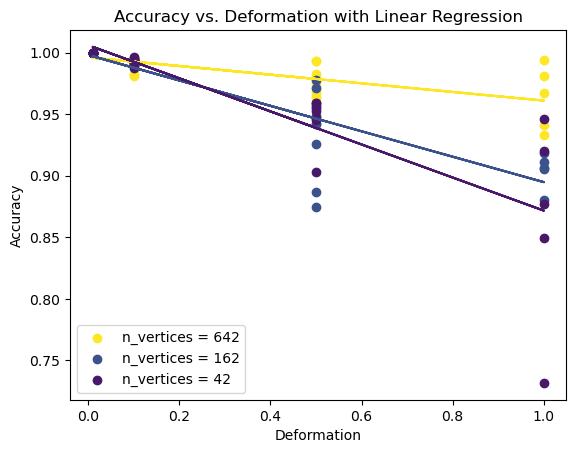

In [34]:
plot_accuracy_vs_deformation(df)

In [35]:
def plot_speed_vs_deformation(df):
    # Get unique values of n_vertices
    unique_n_vertices = df["n_vertices"].unique()

    # Create a scatter plot for each value of n_vertices
    for n_vertices in unique_n_vertices:
        # Filter data for the current n_vertices
        filtered_data = df[df["n_vertices"] == n_vertices]
        # filtered_data = filtered_data.groupby()["diff_seq_per_time_vertex_diameter"]

        # Calculate accuracy and speed per vertex
        speed = filtered_data["speed"] / filtered_data["n_vertices"]

        deformation = filtered_data["noise_factor"]
        x = deformation
        y = speed

        # Plot the scatter points with a specific color
        color = plt.cm.viridis(
            n_vertices / unique_n_vertices.max()
        )  # Color based on n_vertices
        plt.scatter(x, y, color=color, label=f"n_vertices = {n_vertices}")

        # Perform linear regression
        X = np.array(x).reshape(-1, 1)
        y = np.array(y)
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)

        # Plot the linear regression line with the same color as the points
        plt.plot(x, y_pred, color=color)

    # Add labels and title
    plt.xlabel("Deformation")
    plt.ylabel("Speed")
    plt.title("Accuracy vs. Deformation with Linear Regression")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

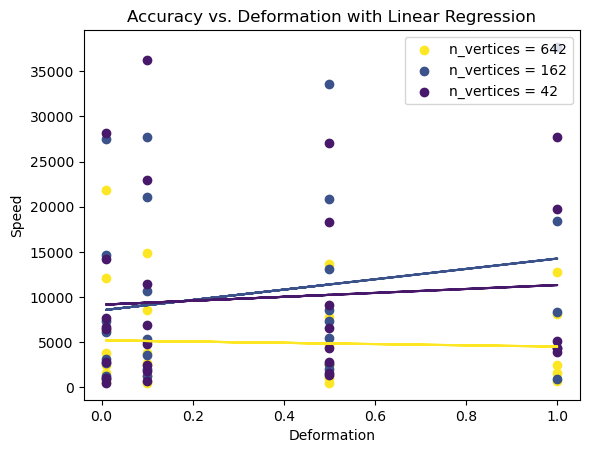

In [36]:
plot_speed_vs_deformation(df)

In [37]:
def plot_rmsd_vs_deformation(df):
    # Get unique values of n_vertices
    unique_n_vertices = df["n_vertices"].unique()

    # Create a scatter plot for each value of n_vertices
    for n_vertices in unique_n_vertices:
        # Filter data for the current n_vertices
        filtered_data = df[df["n_vertices"] == n_vertices]
        # filtered_data = filtered_data.groupby()["diff_seq_per_time_vertex_diameter"]

        # Calculate accuracy and speed per vertex
        rmsd = filtered_data["rmsd_diameter"]
        deformation = filtered_data["noise_factor"]
        x = deformation
        y = rmsd

        # Plot the scatter points with a specific color
        color = plt.cm.viridis(
            n_vertices / unique_n_vertices.max()
        )  # Color based on n_vertices
        plt.scatter(x, y, color=color, label=f"n_vertices = {n_vertices}")

        # Perform linear regression
        X = np.array(x).reshape(-1, 1)
        y = np.array(y)
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)

        # Plot the linear regression line with the same color as the points
        plt.plot(x, y_pred, color=color)

    # Add labels and title
    plt.xlabel("Deformation")
    plt.ylabel("RMSD (per diameter)")
    plt.title("RMSD vs. Deformation with Linear Regression")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

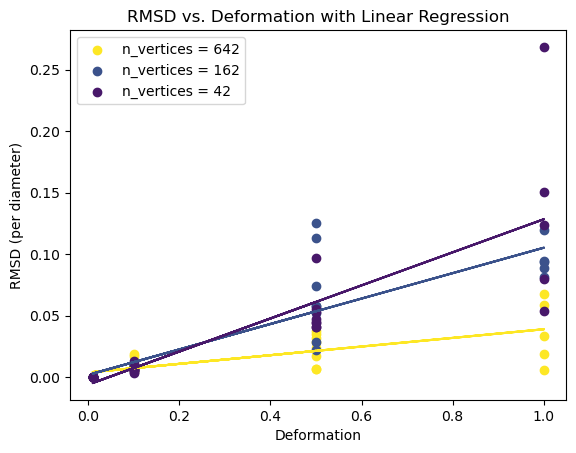

In [38]:
plot_rmsd_vs_deformation(df)

In [ ]:
# could it be that the geodesic stays a qstart and that therefore we're computing the difference between qstart and qend?

In [39]:
def plot(mesh_dirname, n_times=10):
    mesh_sequence_vertices = [
        
    ]
    mesh_sequence_vertices = viz.offset_mesh_sequence(mesh_sequence_vertices)
    viz.plot_mesh_sequence(mesh_sequence_vertices)

## Line Plots

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def line_plot(y_var, y):
    y = y.reset_index()
    colors_vertices = [
        px.colors.sequential.Plasma_r[0],
        px.colors.sequential.Plasma_r[5],
        px.colors.sequential.Plasma_r[-1],
    ]

    marked_by = "n_steps"
    value_to_symbol = dict(
        zip(df[marked_by].unique(), ["square", "x", "cross", "diamond", "star"])
    )

    fig = px.scatter(
        x=y["noise_factor"],
        y=y[y_var],
        color=y["n_vertices"],
        color_discrete_sequence=colors_vertices,
        symbol=[s for s in y[marked_by].values],
        symbol_map=value_to_symbol,
    )
    fig.update_layout(
        title="Line Plot",
        title_font=dict(family="CMU", size=fontsize),
        xaxis_title=dict(
            text="Deformation Factor",
            font=dict(family="CMU", size=fontsize),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[y_var], font=dict(family="CMU", size=fontsize)
        ),
        xaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        yaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        width=600,
        height=350,
    )

    color_sequence = colors_vertices[::-1]
    for n_vertices, color in zip(y["n_vertices"].unique(), color_sequence):
        filtered_data = y[y["n_vertices"] == n_vertices]

        xx = filtered_data["noise_factor"].values.reshape(-1, 1)
        yy = filtered_data[y_var].values.reshape(-1, 1)
        regression_model = LinearRegression()
        regression_model.fit(xx, yy)
        regression_y = regression_model.predict(xx)

        r_squared = r2_score(yy, regression_y)
        print(r_squared)

        fig.add_trace(
            go.Scatter(
                x=xx.flatten(),
                y=regression_y.flatten(),
                mode="lines",
                name=f"n_vertices: {n_vertices} (R2={r_squared:.3f})",
                line=dict(color=color),
                showlegend=True,  # Show legend only for the regression lines
                legendgroup="regression",
            )
        )

    fig.data[0].showlegend = False  # Show legend for the scatter symbols
    fig.data[0].legendgroup = "scatter"
    fig.show()
    pio.write_image(fig, f"{y_var}_vs_deformation_factor.svg")

In [41]:
y_var = "diff_seq_per_time_vertex_diameter"
y = df.groupby(["noise_factor", "n_vertices", "n_steps"])[y_var].mean() * 100

line_plot(y_var, y)

0.6204496504982722


NameError: name 'go' is not defined

In [64]:
y_var = "relative_diff_seq_duration_per_vertex"
df["relative_diff_seq_duration_per_vertex"] = (
    df["relative_diff_seq_duration"] / df["n_vertices"]
)
y = df.groupby(["noise_factor", "n_vertices", "n_steps"])[y_var].mean()

line_plot(y_var, y)

KeyError: 'relative_diff_seq_duration_per_vertex'